In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data inspection

In [33]:
df = pd.read_csv(r"C:\Users\albert\Nextcloud\Documents\Andere\Kargar\data_points.csv", sep=";")

<Axes: xlabel='time', ylabel='diss_rate'>

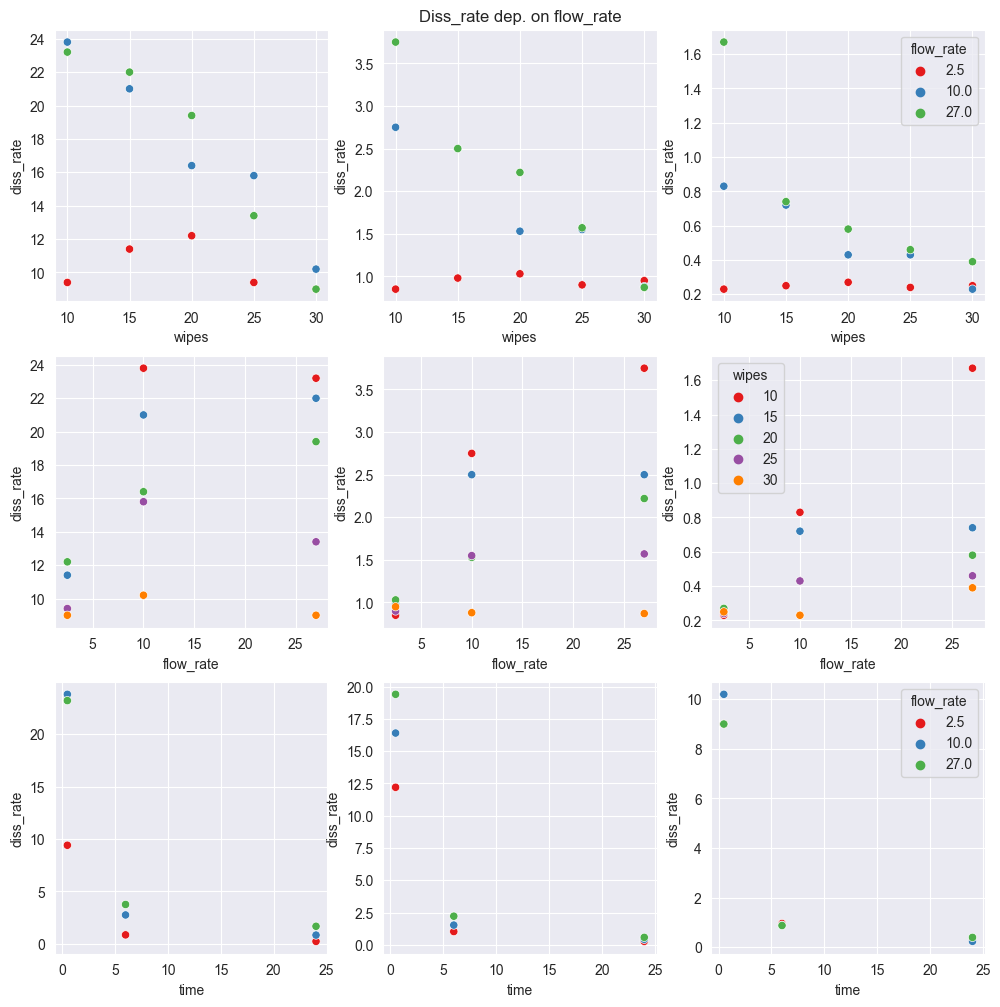

In [42]:
sns.set_palette(sns.color_palette("Set2"))

fig, axs = plt.subplots(ncols=3, nrows=3, figsize=[12, 12])
axs[0][1].set(title="Diss_rate dep. on n_wipes")
sns.scatterplot(x="wipes", y="diss_rate", data=df.loc[df["time"]==0.5], hue="flow_rate", ax=axs[0][0], palette="Set1", legend=False)
sns.scatterplot(x="wipes", y="diss_rate", data=df.loc[df["time"]==6], hue="flow_rate", ax=axs[0][1], palette="Set1", legend=False)
sns.scatterplot(x="wipes", y="diss_rate", data=df.loc[df["time"]==24], hue="flow_rate", ax=axs[0][2], palette="Set1")

axs[0][1].set(title="Diss_rate dep. on flow_rate")
sns.scatterplot(x="flow_rate", y="diss_rate", data=df.loc[df["time"]==0.5], hue="wipes", ax=axs[1][0], palette="Set1", legend=False)
sns.scatterplot(x="flow_rate", y="diss_rate", data=df.loc[df["time"]==6], hue="wipes", ax=axs[1][1], palette="Set1", legend=False)
sns.scatterplot(x="flow_rate", y="diss_rate", data=df.loc[df["time"]==24], hue="wipes", ax=axs[1][2], palette="Set1")

axs[0][1].set(title="Diss_rate dep. on flow_rate")
sns.scatterplot(x="time", y="diss_rate", data=df.loc[df["wipes"]==10], hue="flow_rate", ax=axs[2][0], palette="Set1", legend=False)
sns.scatterplot(x="time", y="diss_rate", data=df.loc[df["wipes"]==20], hue="flow_rate", ax=axs[2][1], palette="Set1", legend=False)
sns.scatterplot(x="time", y="diss_rate", data=df.loc[df["wipes"]==30], hue="flow_rate", ax=axs[2][2], palette="Set1")

# Model training and testing

after inspection of the data, the model was built as follows: $$k = (\beta_1s + \beta_2q + \beta_3sq + \beta_4)e^{\beta_5t}$$
with k being dissipation rate, q being flow ratio, s being blockage size and t age of the blockage
 

In [7]:
from scipy.optimize import curve_fit
import numpy as np

# Extract the necessary data columns
wipes = df['wipes']
flow_rate = df['flow_rate']
time = df['time']
diss_rate = df['diss_rate']

In [12]:
# Define the model function
def model_function(X, b1, b2, b3, b4, b5):
    wipes, flow_rate, time = X
    return (b1 * wipes + b2 * flow_rate + b3 * wipes * flow_rate + b4) * np.exp(b5 * time)

# Fit the model
initial_guess = [1, 1, 1, 1, -0.1]  # Initial guess for the parameters

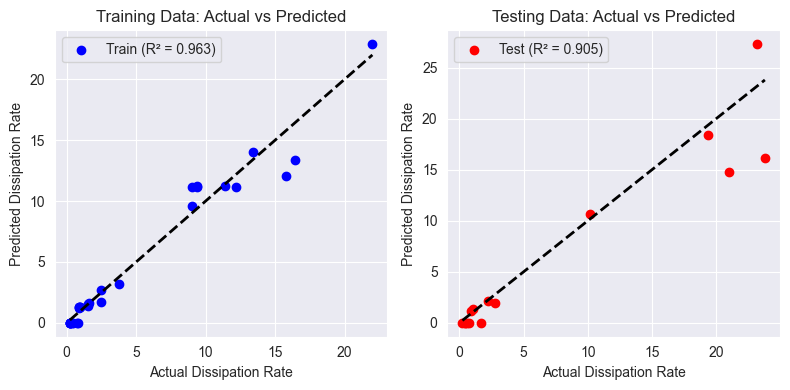

(0.9631879438957727, 0.9047355565029309)

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(
    np.array([wipes, flow_rate, time]).T, diss_rate, test_size=1/3, random_state=42
)

# Unpack the tuples for use in the model function
wipes_train, flow_rate_train, time_train = X_train.T
wipes_test, flow_rate_test, time_test = X_test.T

# Fit the model using only the training data
params_train, _ = curve_fit(model_function, (wipes_train, flow_rate_train, time_train), y_train, p0=initial_guess)

# Calculate predictions for both training and testing sets
predicted_train = model_function((wipes_train, flow_rate_train, time_train), *params_train)
predicted_test = model_function((wipes_test, flow_rate_test, time_test), *params_train)

# Calculate R-squared values for training and testing
r2_train = r2_score(y_train, predicted_train)
r2_test = r2_score(y_test, predicted_test)

# Plot the results
plt.figure(figsize=(8, 4))

# Training data plot
plt.subplot(1, 2, 1)
plt.scatter(y_train, predicted_train, color='blue', label='Train (R² = {:.3f})'.format(r2_train))
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.xlabel('Actual Dissipation Rate')
plt.ylabel('Predicted Dissipation Rate')
plt.title('Training Data: Actual vs Predicted')
plt.legend()
plt.grid(True)

# Testing data plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, predicted_test, color='red', label='Test (R² = {:.3f})'.format(r2_test))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Dissipation Rate')
plt.ylabel('Predicted Dissipation Rate')
plt.title('Testing Data: Actual vs Predicted')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

(r2_train, r2_test)